In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = path = '/gdrive/My Drive/ML1 Course1 Sept 2020/Assignments/Data/'

In [ ]:
raw_data = pd.read_csv(path+"Iris.csv")
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
raw_data = raw_data.drop(columns="Id")
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.utils import shuffle
raw_data = shuffle(raw_data)
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
107,7.3,2.9,6.3,1.8,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw_data["Species"] = le.fit_transform(raw_data["Species"])

raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
107,7.3,2.9,6.3,1.8,2
117,7.7,3.8,6.7,2.2,2
32,5.2,4.1,1.5,0.1,0
139,6.9,3.1,5.4,2.1,2
58,6.6,2.9,4.6,1.3,1


In [ ]:
colms = raw_data.shape[1]
y = raw_data.iloc[:,colms-1:colms]
x = raw_data.iloc[:,1:colms-1]

x = np.array(x)
y = np.ravel(y)

print(x.shape, y.shape)

(150, 3) (150,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(112, 3) (38, 3) (112,) (38,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

score = model.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))
score = model.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 98.21 %
Test F1 Score = 97.37 %


In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_prediction)
train_accuracy = round(train_accuracy, 4)*100
print('Training Accuracy = {} %'.format(train_accuracy))

test_accuracy = accuracy_score(y_test, test_prediction)
test_accuracy = round(test_accuracy, 4)*100
print('Test Accuracy = {} %'.format(test_accuracy))

Training Accuracy = 98.21 %
Test Accuracy = 97.37 %


[[14  0  0]
 [ 0 15  0]
 [ 0  1  8]]


Text(0.5, 1.0, 'Test F1 Score:97.37%')

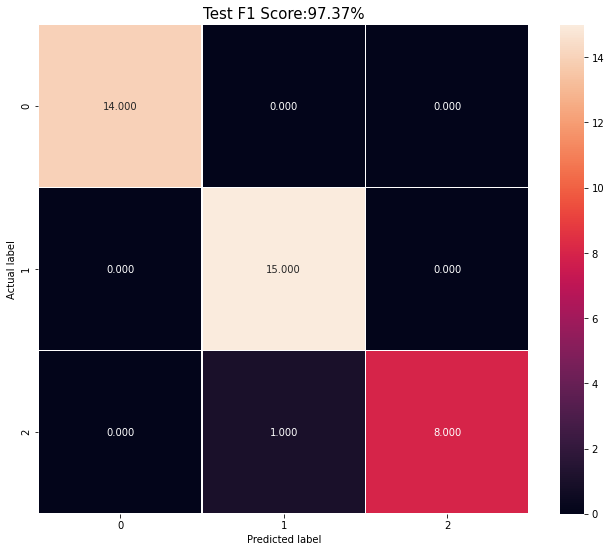

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_prediction)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import classification_report

print('**********  Training Data Report  **********')
print(classification_report(y_train, train_prediction))
print('**********  Test Data Report  **********')
print(classification_report(y_test, test_prediction))

**********  Training Data Report  **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.94      0.97        35
           2       0.95      1.00      0.98        41

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112

**********  Test Data Report  **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38

